<a href="https://colab.research.google.com/github/yashx007/ML/blob/main/A3_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Results Without Cross-Validation:
Mean Squared Error: 1771751116594.041
R² Score: 0.6494754192267792

Model Coefficients:
area: 519288.13010470814
bedrooms: 58690.918497543666
bathrooms: 523153.3828425305
stories: 348177.11360990105
mainroad: 128115.9279775107
guestroom: 89357.6462075466
basement: 188462.04856578953
hotwaterheating: 150570.02827933675
airconditioning: 362446.18646599253
parking: 192786.98589142985
prefarea: 266661.04914927925
furnishingstatus: -158183.27016873794

Model Intercept: 4706527.385321101

Results With Cross-Validation:
Cross-Validation R² Scores: [ -1.94277003  -5.00707214 -16.22431367 -21.10749485  -5.27173317]
Average R² Score: -9.910676773077174


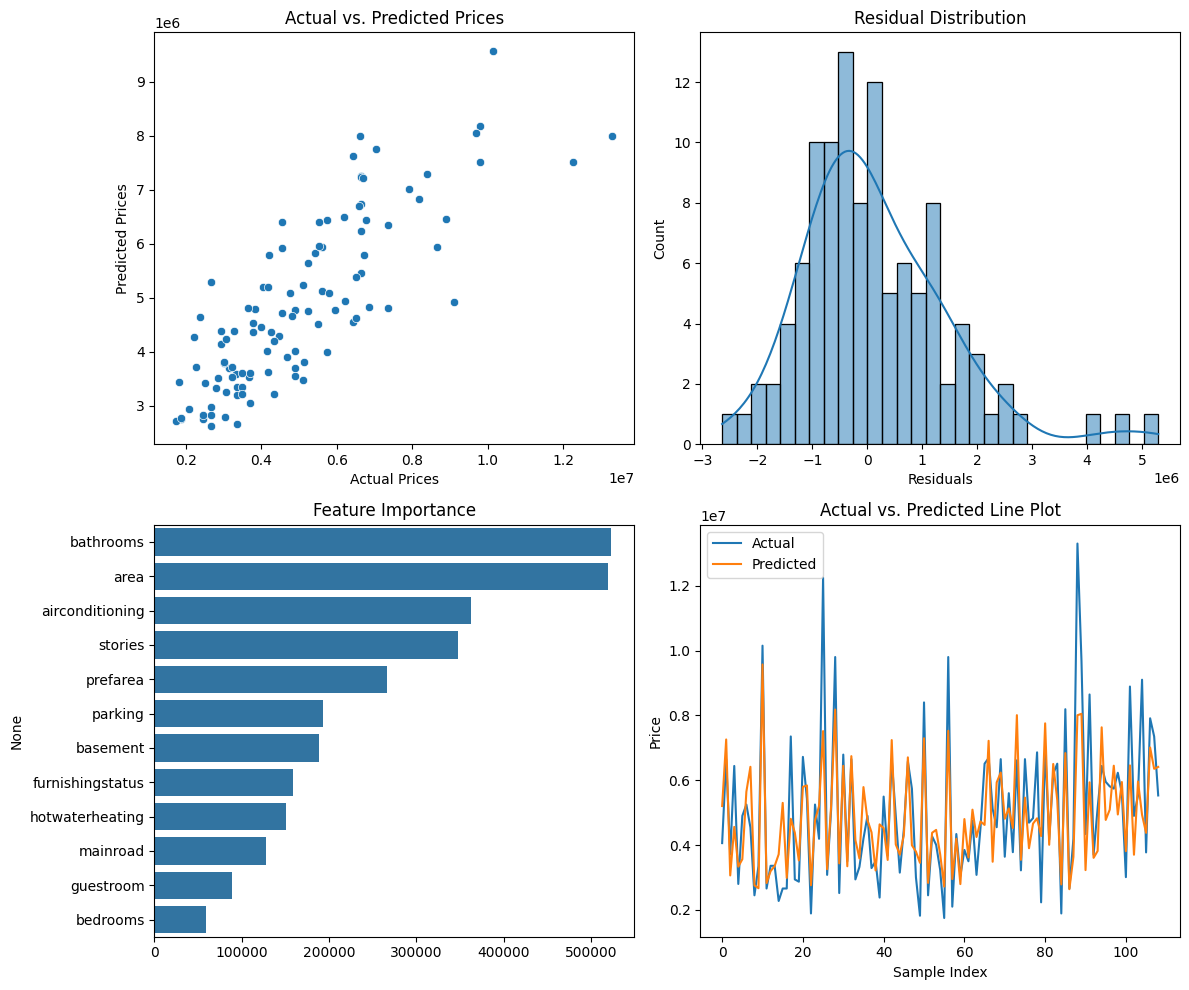

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Load dataset
path = '/content/Housing.csv'
data = pd.read_csv(path)

# Define features and target
X = data.drop(columns=['price'])
y = data['price']

# Convert categorical variables
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                        'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])

# One-hot encoding (if needed)
X = pd.get_dummies(X, drop_first=True)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Results Without Cross-Validation:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Print coefficients and intercept
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
print("\nModel Intercept:", model.intercept_)

# Cross-Validation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
print("\nResults With Cross-Validation:")
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Average R² Score: {cv_scores.mean()}")

# Plotting results
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot of actual vs. predicted values
sns.scatterplot(x=y_test, y=y_pred, ax=axs[0, 0])
axs[0, 0].set_title('Actual vs. Predicted Prices')
axs[0, 0].set_xlabel('Actual Prices')
axs[0, 0].set_ylabel('Predicted Prices')

# Residual plot
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30, ax=axs[0, 1])
axs[0, 1].set_title('Residual Distribution')
axs[0, 1].set_xlabel('Residuals')

# Feature importance
feature_importance = pd.Series(np.abs(model.coef_), index=X.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance.values, y=feature_importance.index, ax=axs[1, 0])
axs[1, 0].set_title('Feature Importance')

# Line plot of predictions
sns.lineplot(x=range(len(y_test)), y=y_test.values, label='Actual', ax=axs[1, 1])
sns.lineplot(x=range(len(y_pred)), y=y_pred, label='Predicted', ax=axs[1, 1])
axs[1, 1].set_title('Actual vs. Predicted Line Plot')
axs[1, 1].set_xlabel('Sample Index')
axs[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()
